In [1]:
%config IPCompleter.greedy=True

# Press Shift + Tab

In [17]:
import pandas as pd
import csv
import numpy as np
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option("display.precision", 9)

data_1 = pd.read_csv('매매가시계열.csv',index_col=0)
data_2 = pd.read_csv('전세가시계열.csv',index_col=0)
data_3 = pd.read_csv('전세가율시계열.csv',index_col=0)

In [3]:
data_1.shape,data_2.shape,data_3.shape

((39422, 151), (39422, 151), (39422, 151))

In [4]:
df1 = data_1.copy()

df1 = df1.fillna(0)

data1 = {}

for i in range(df1.shape[0]):
    dt = []
    for j in range(df1.shape[1]):
        if j + 24 == 151:
            break
        x = df1.iloc[i,j]
        if x == 0:
            dt.append(0)
        else:
            y = (df1.iloc[i,j+24]-df1.iloc[i,j])/df1.iloc[i,j]
            dt.append(y)
    data1[df1.index[i]]=dt
df1_r = pd.DataFrame.from_dict(data=data1, orient='index', columns=df1.columns[24:151])

df1_r.head()

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07
강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000000,0.000000000,0.000000000,0.0000000,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.096092427,0.089653766,0.093678644,0.101544910,0.105132381,0.118902047,0.085432121,0.057496561,0.043764916,0.031963371,0.024406455,0.029872803,0.042947817,0.038446873,0.016992308,0.012544537,0.014938535,0.023426734,0.040064830,0.057659330,0.073039837,0.082940903,0.091335413,0.105803255,0.114179442,0.122804893,0.135366189,0.136357212,0.133417961,0.105744316,0.099864977,0.101456816,0.105294480,0.117180255,0.128516576,0.127855192,0.116799158,0.11088147,0.104492934,0.093635783,0.076451191,0.053254561,0.037628041,0.023855257,0.013812864,0.007002501,0.004276796,-0.003030000,-0.007776281
강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 초과,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.079861017,-0.068432337,-0.062058673,-0.0412884,-0.01589866,0.003879968,0.006940799,0.023963654,0.040899181,0.053960149,0.065115437,0.066329659,0.065273765,0.082835387,0.222781491,0.241771258,0.243813665,0.245817142,0.253839820,0.260140317,0.252683877,0.240264007,0.22940680,0.235033416,0.244292267,0.258119386,0.266715875,0.269873681,0.270285853,0.285470130,0.291576582,0.290994071,0.283087123,0.273750489,0.262932787,0.254696503,0.251231081,0.258031649,0.126035310,0.125204174,0.115415550,0.113986872,0.115202058,0.130209021,0.175421393,0.207063730,0.219409451,0.217803030,0.206951422,0.188422011,0.174928393,0.175380636,0.190920856,0.178048994,0.170619768,0.166346873,0.155892491,0.142866059,0.128514755,0.121786684,0.115038354,0.097355871,0.096092427,0.089653766,0.093678644,0.101544910,0.105132381,0.118902047,0.085432121,0.057496561,0.043764916,0.031963371,0.024406455,0.029872803,0.228364771,0.223063642,0.197794850,0.192556347,0.195375954,0.205373199,0.224969242,0.245691721,0.263806599,0.275467893,0.285354792,0.302394752,0.312260070,0.322418968,0.337213431,0.338380640,0.334918844,0.302325334,0.295400756,0.297275595,0.301795525,0.315794372,0.329146084,0.328367117,0.742187500,0.73295601,0.722990003,0.706053033,0.679245365,0.643059021,0.618681919,0.597196612,0.581530651,0.570906602,0.566654549,0.555256073,0.547851956
강남구 개포동 1164-13 아파트 새롬(1164-13)(2000) 60㎡ 2층 이하,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [5]:
df2 = data_2.copy()

df2 = df2.fillna(0)

data2 = {}

for i in range(df2.shape[0]):
    dt = []
    for j in range(df2.shape[1]):
        if j + 24 == 151:
            break
        x = df2.iloc[i,j]
        if x == 0:
            dt.append(0)
        else:
            y = (df2.iloc[i,j+24]-df2.iloc[i,j])/df2.iloc[i,j]
            dt.append(y)
    data2[df2.index[i]]=dt

df2_r = pd.DataFrame.from_dict(data=data2, orient='index', columns=df2.columns[24:151])

df2_r.head()

,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07
강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,-0.056154868,-0.059413286,-0.057929487,-0.054491820,-0.051830723,-0.044504819,-0.029449602,-0.025748542,-0.019530619,-0.010155582,0.004664435,0.016114216,0.027166365,0.036426231,0.036885517,0.039391207,0.055501150,0.072355785,0.095649749,0.128319289,0.153471659,0.157811427,0.158604624,0.164022396,0.170023022,0.175116276,0.181826593,0.185618402,0.183517301,0.171574933,0.147816770,0.141831871,0.137385311,0.132841127,0.132237273,0.130017100,0.121898189,0.109274042,0.094298689,0.076590207,0.032848580,-0.027555610,-0.086922881,-0.140096277,-0.169390011,-0.175425722,-0.168861589,-0.169690000,-0.172107444
강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 초과,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250021067,0.267300985,0.277092071,0.286743043,0.287683665,0.273359219,0.509556258,0.507992064,0.507837881,0.509645663,0.520552252,0.560957688,0.580185488,0.601321794,0.599544891,0.583068879,0.559833430,0.546373317,0.558096277,0.563506182,0.551748831,0.367616211,0.361519038,0.261138353,0.266102041,0.264664082,0.261992543,0.260658954,0.099610220,0.094964097,0.142857143,0.140835761,0.135461724,0.122581900,0.109296894,0.087092834,0.077457822,0.071580058,0.069428361,0.067850845,0.060288546,0.054828086,0.047370742,0.047953027,0.052343008,0.050727218,0.045181152,0.130883482,0.114278029,0.104810401,0.099656449,0.099997020,0.266493492,0.311722096,0.049388018,0.045104926,0.033672522,0.012278832,-0.008076808,-0.014054055,-0.017374245,-0.021405343,-0.024536460,-0.027904034,-0.026370528,-0.022817701,-0.020067459,-0.012496140,0.003063420,0.006888464,0.013314684,0.023003782,0.038320263,0.050153607,0.061575998,0.071146066,0.071620737,0.309523810,0.329820647,0.351055718,0.380403667,0.421563858,0.453253203,0.458720856,0.459720201,0.466546024,0.474106183,0.480523149,0.488977444,0.493754725,0.491107558,0.476061428,0.446128637,0.438588293,0.432986094,0.420899254,0.420141853,0.417357136,0.407173753,0.391339546,0.372556269,0.071791586,0.028244925,-0.031890029,-0.090992685,-0.143929074,-0.173092239,-0.179101048,-0.172566173,-0.173390891,-0.175797560
강남구 개포동 1164-13 아파트 새롬(1164-13)(2000) 60㎡ 2층 이하,0.0,0.0,0.0

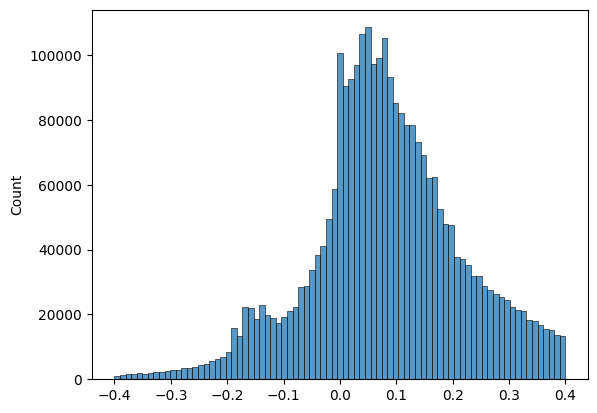

In [6]:
dt2 = []

for i in range(df2.shape[0]):
    for j in range(df2.shape[1]):
        if j + 24 == 151:
            break
        x = df2.iloc[i,j]
        if x == 0:
            pass
        else:
            y = round((df2.iloc[i,j+24]-df2.iloc[i,j])/df2.iloc[i,j],2)
            dt2.append(y)

dt22 = dt2.copy()

dt22 = [i for i in dt22 if i >= -0.4]
dt22 = [i for i in dt22 if i <= 0.4]

set22 = set(dt22)
fig, ax = plt.subplots()
sns.histplot(data=dt22,ax=ax, bins = 81)
plt.show()

Text(0, 0.5, 'Rate')

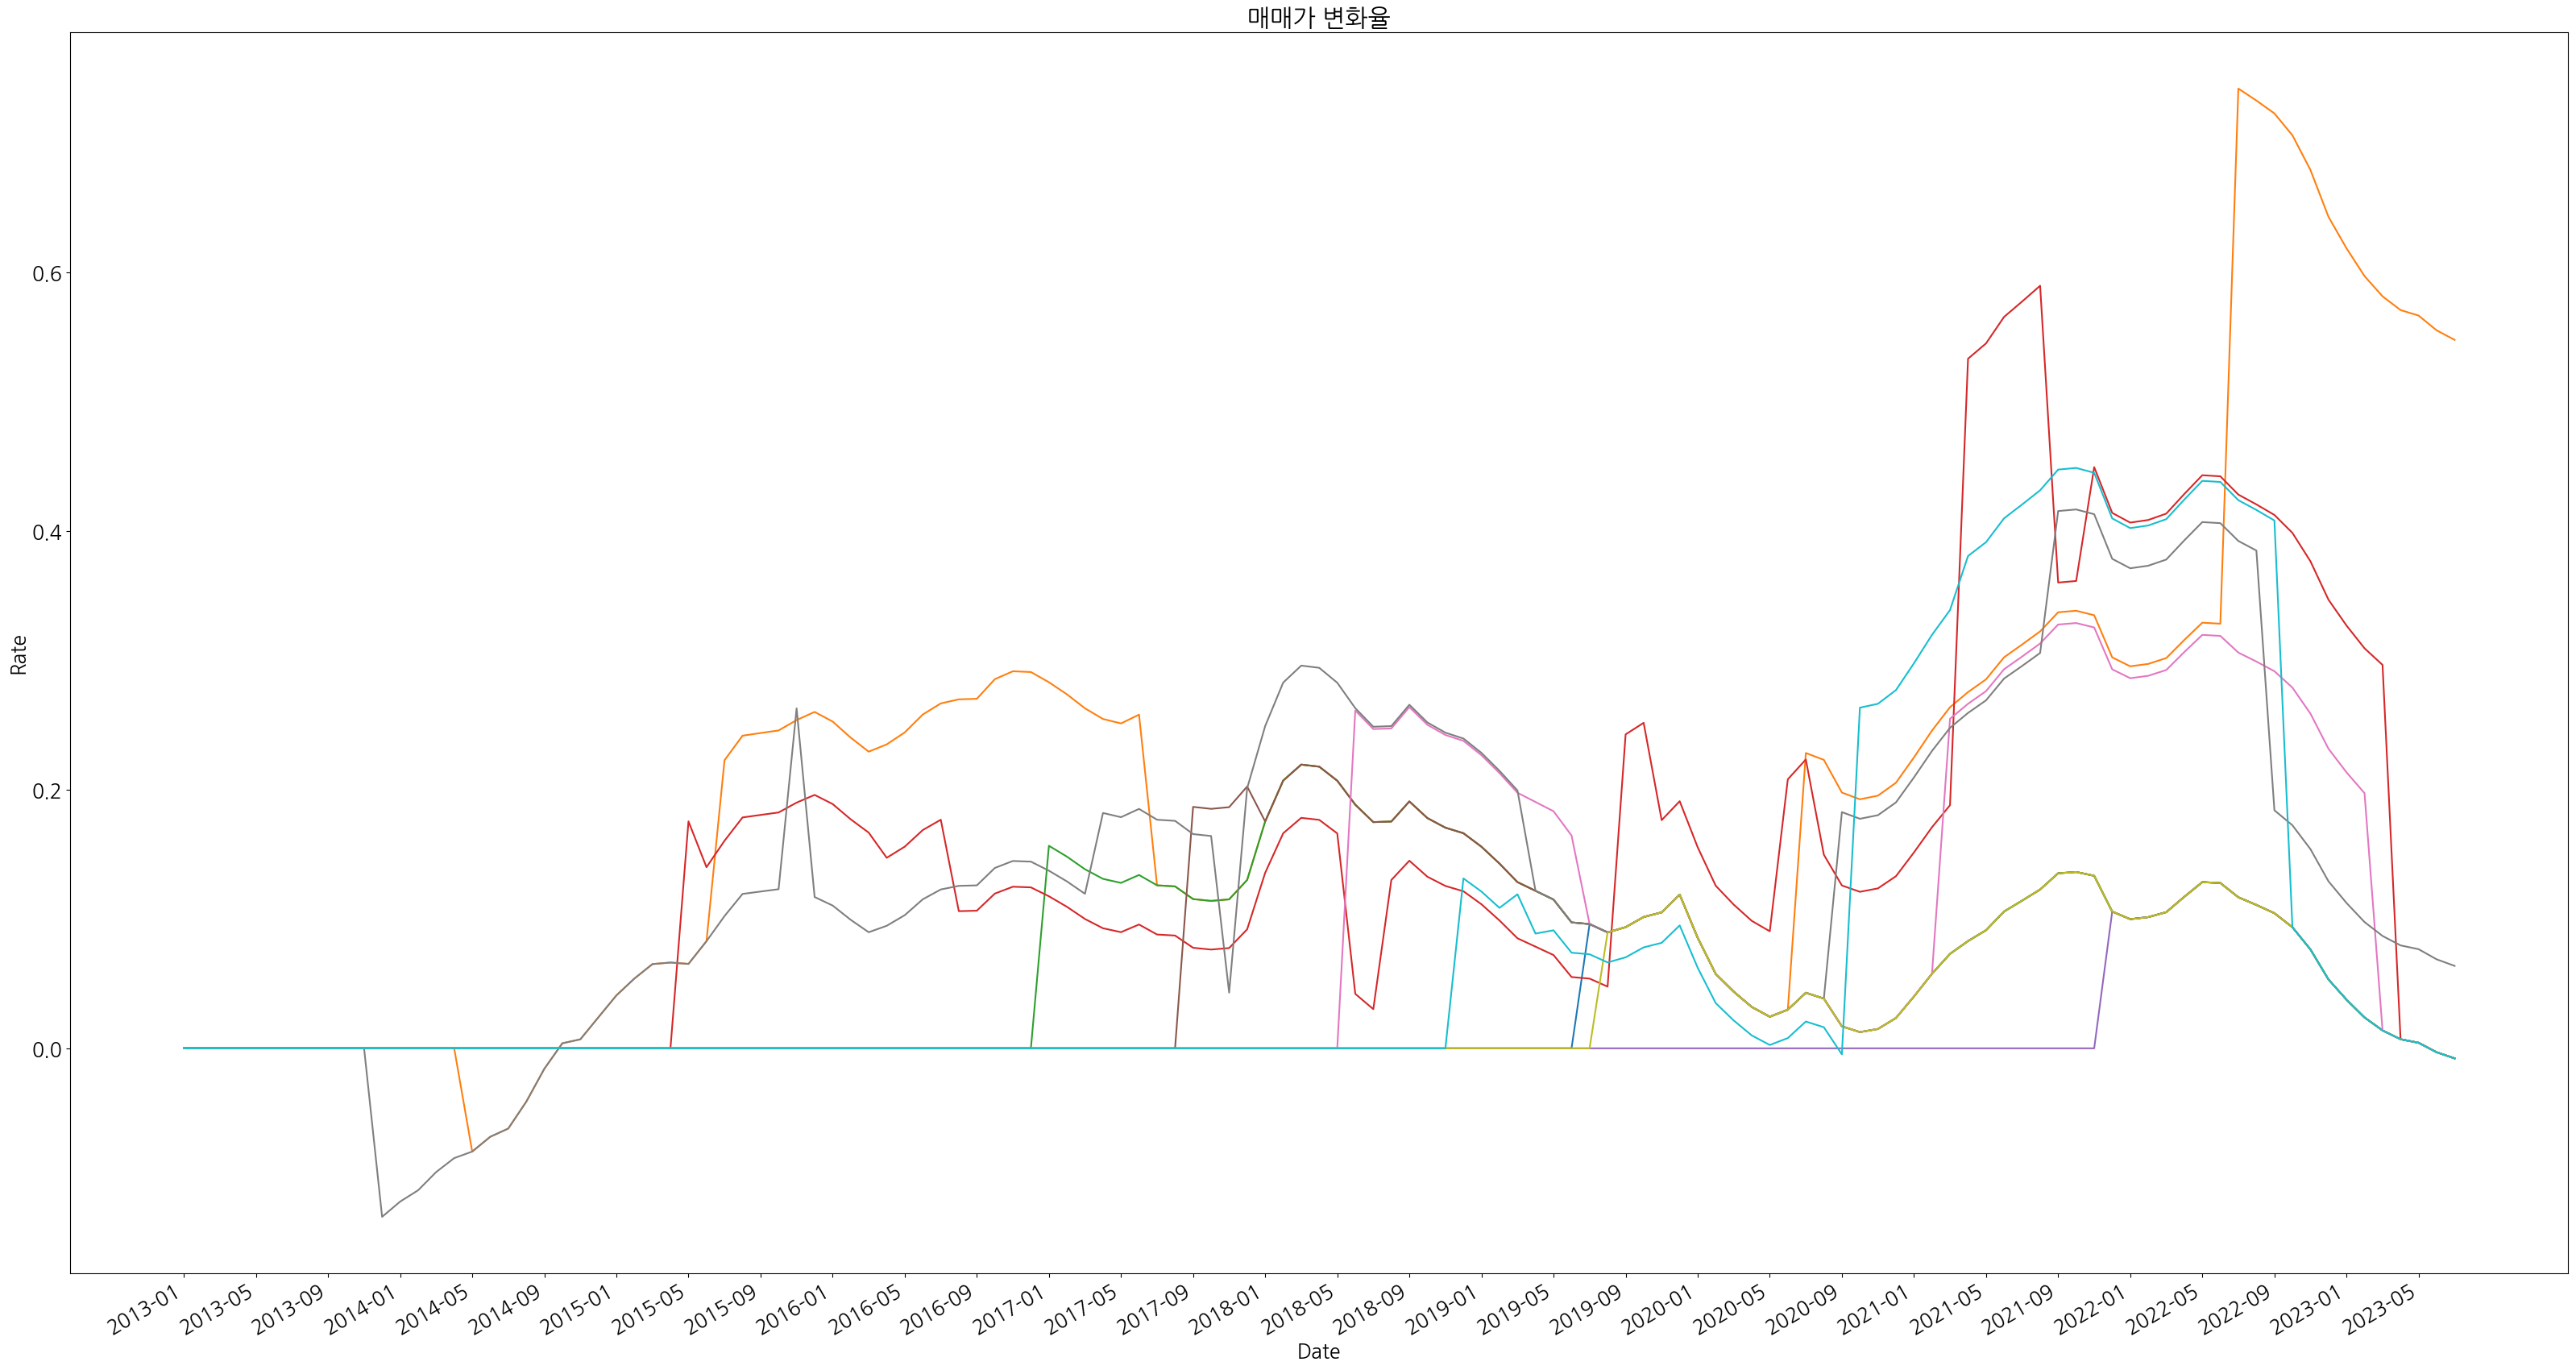

In [26]:
# 폰트 설정
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제 해결
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
# 폰트 설치 경로를 이용하여 폰트 이름 찾기
path = './NanumGothic.ttf'
font_name = fm.FontProperties(fname=path).get_name()
# 폰트 설정
plt.rc('font', family=font_name)

fe = fm.FontEntry(
    fname=r'NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

df1_p = df1_r[:10]
plt_1 = plt.figure(figsize=(40, 20))
for i in range(10):
    plt.plot(df1_p.iloc[i],)
 
# Giving title to the chart using plt.title
plt.title('매매가 변화율')
 
# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(np.arange(0, 127, step=4),rotation=30, ha='right')
 
# Providing x and y label to the chart
plt.xlabel('Date')
plt.ylabel('Rate')

Text(0, 0.5, 'Rate')

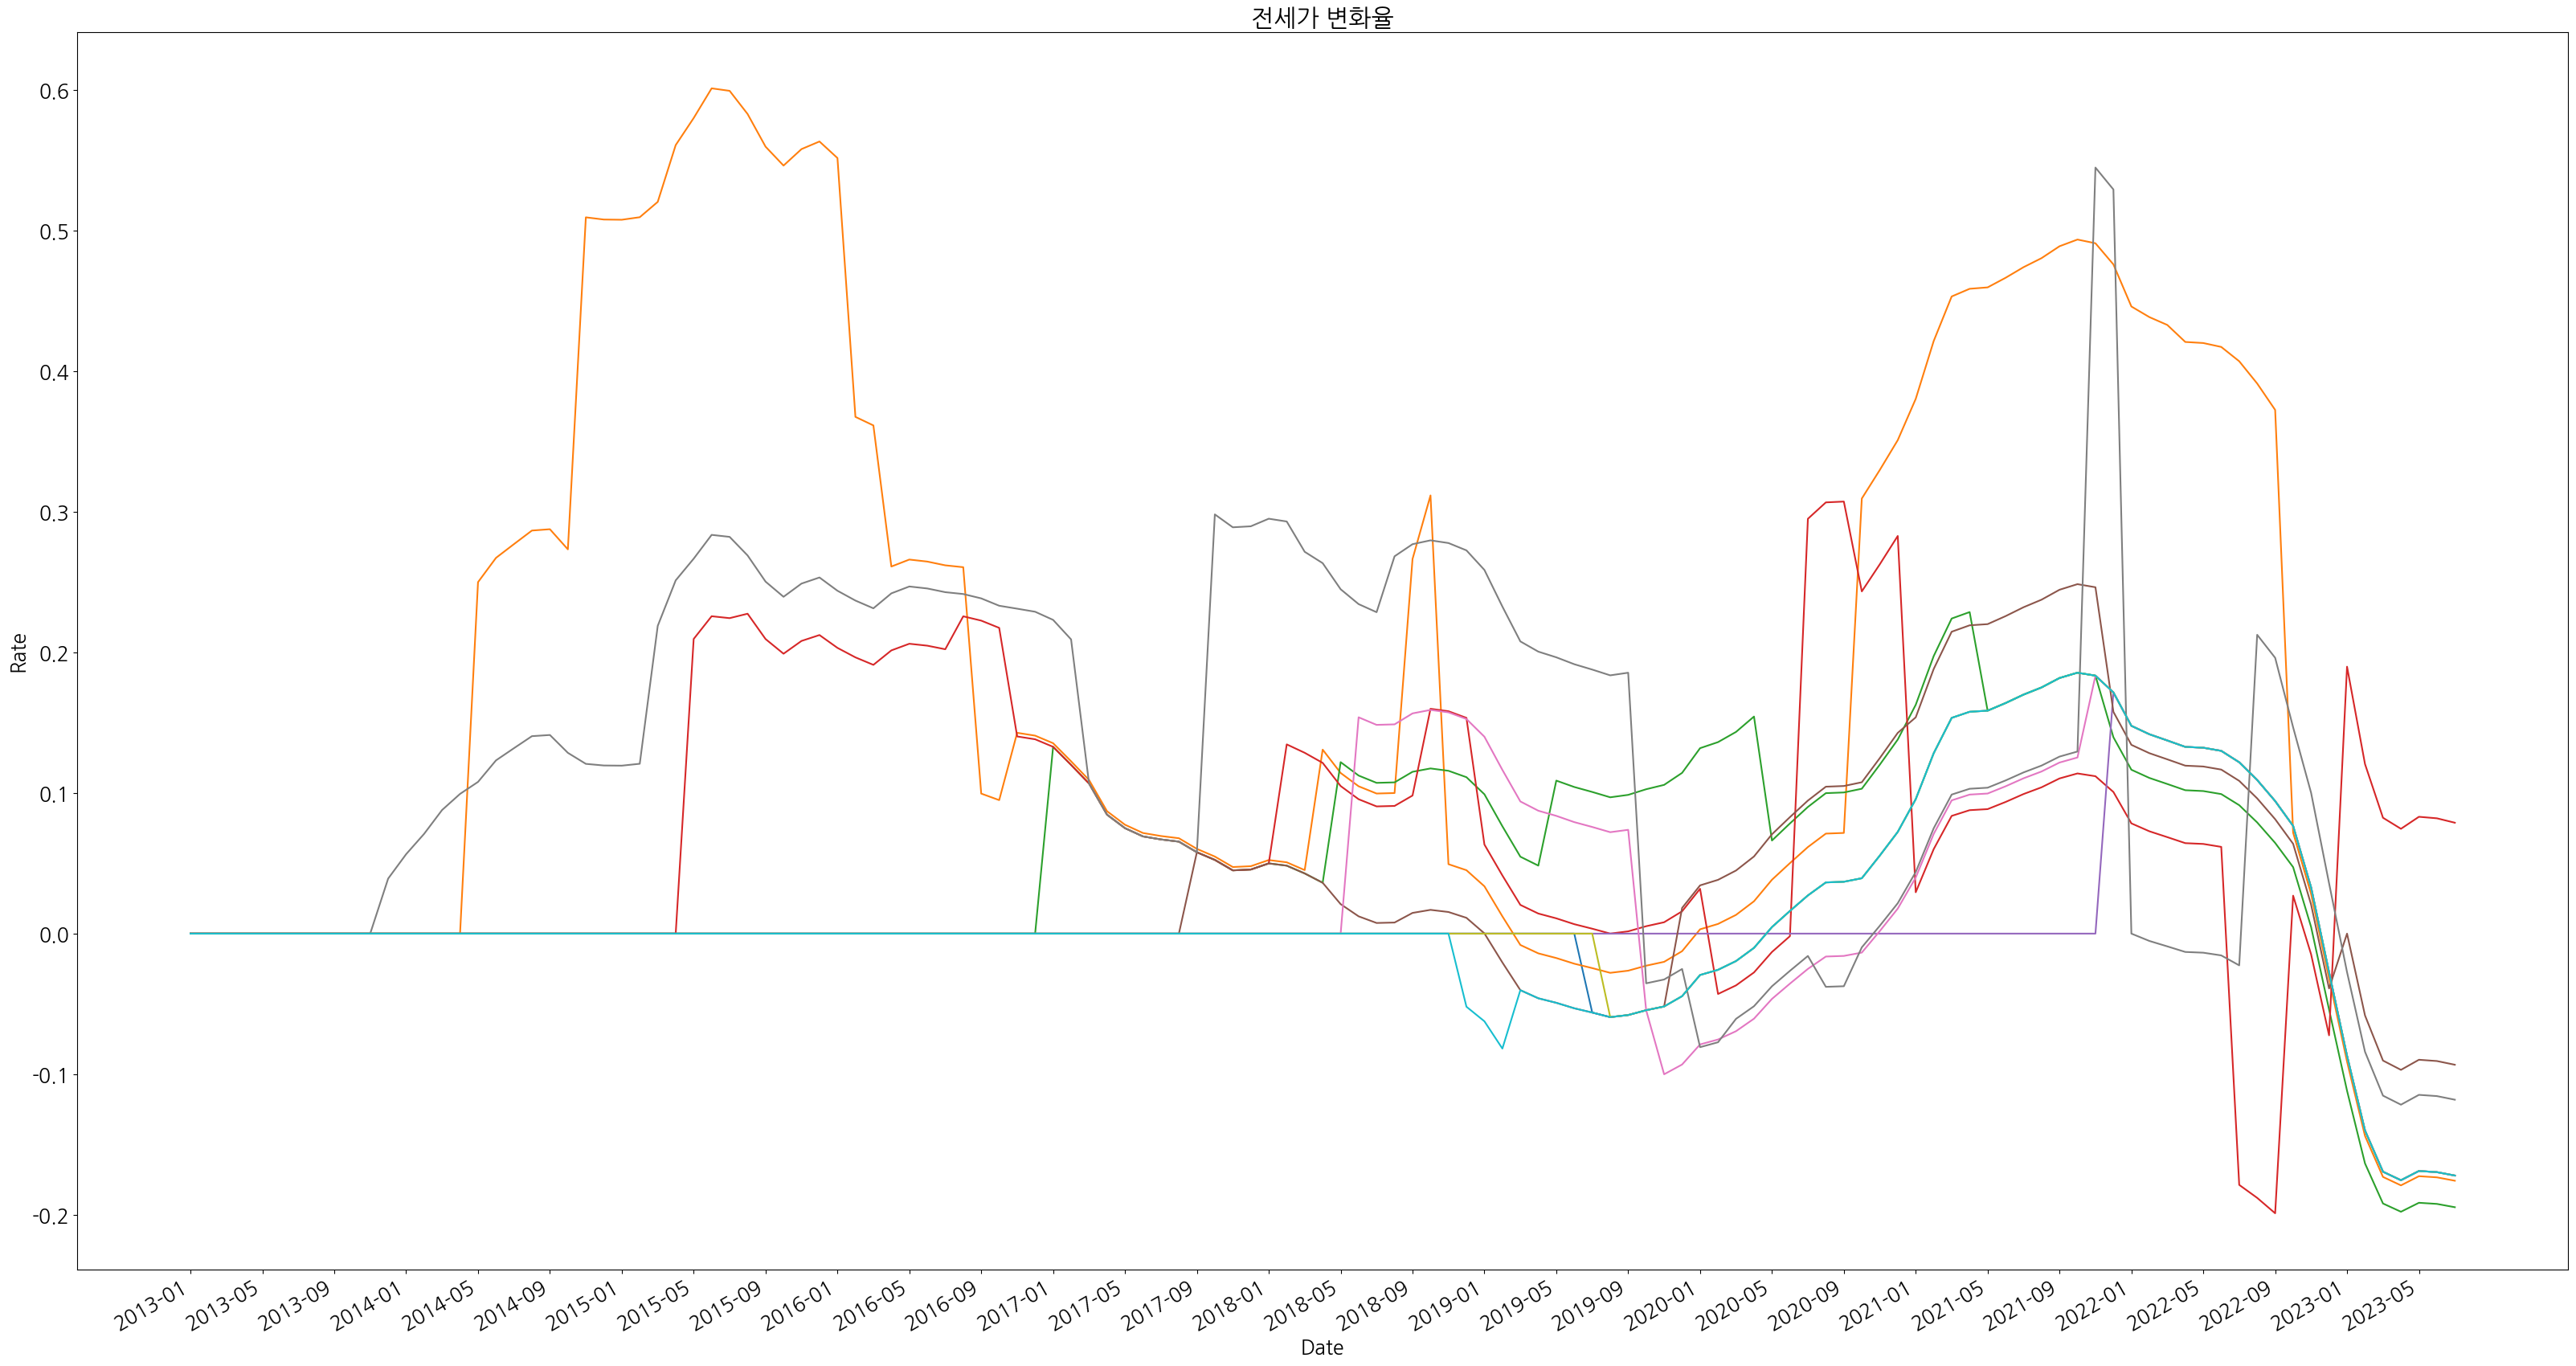

In [28]:
df2_p = df2_r[:10]
plt_2 = plt.figure(figsize=(40, 20))
for i in range(10):
    plt.plot(df2_p.iloc[i],)
 
# Giving title to the chart using plt.title
plt.title('전세가 변화율')
 
# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(np.arange(0, 127, step=4),rotation=30, ha='right')
 
# Providing x and y label to the chart
plt.xlabel('Date')
plt.ylabel('Rate')

Text(0, 0.5, 'Rate')

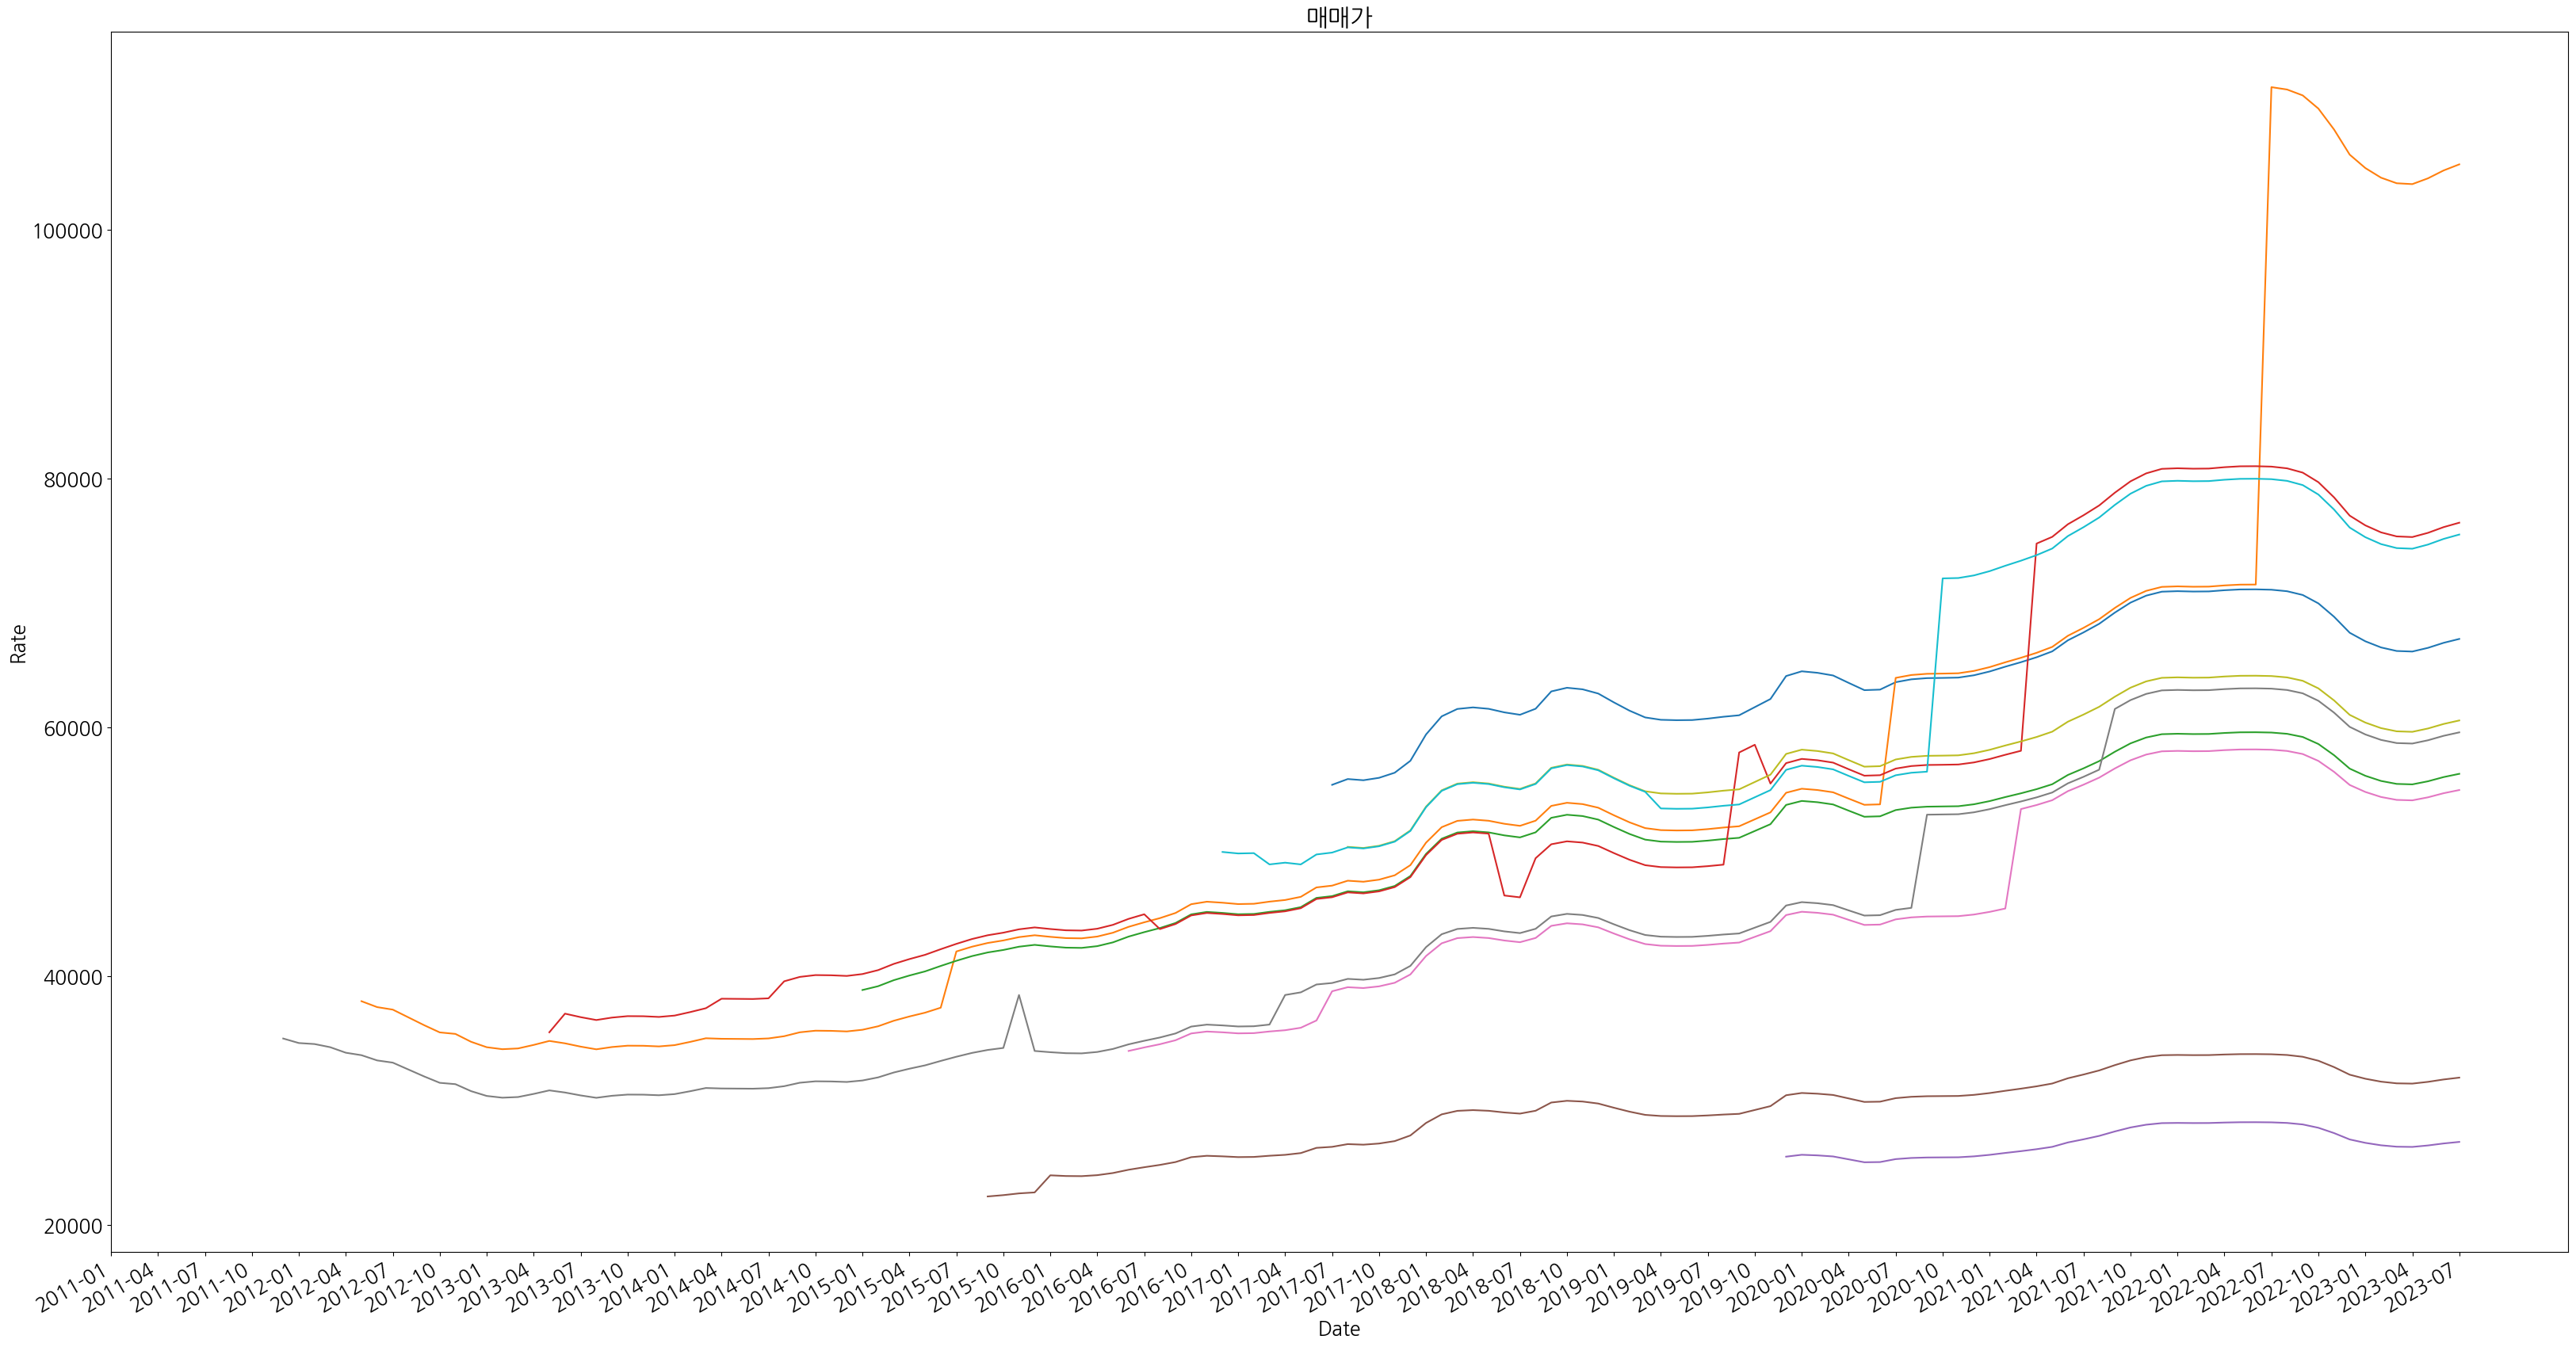

In [38]:
data1_p = data_1[:10]
plt_3 = plt.figure(figsize=(40, 20))
for i in range(10):
    plt.plot(data1_p.iloc[i],)
 
# Giving title to the chart using plt.title
plt.title('매매가')
 
# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(np.arange(0, 151, step=3),rotation=30, ha='right')
 
# Providing x and y label to the chart
plt.xlabel('Date')
plt.ylabel('Rate')

Text(0, 0.5, 'Rate')

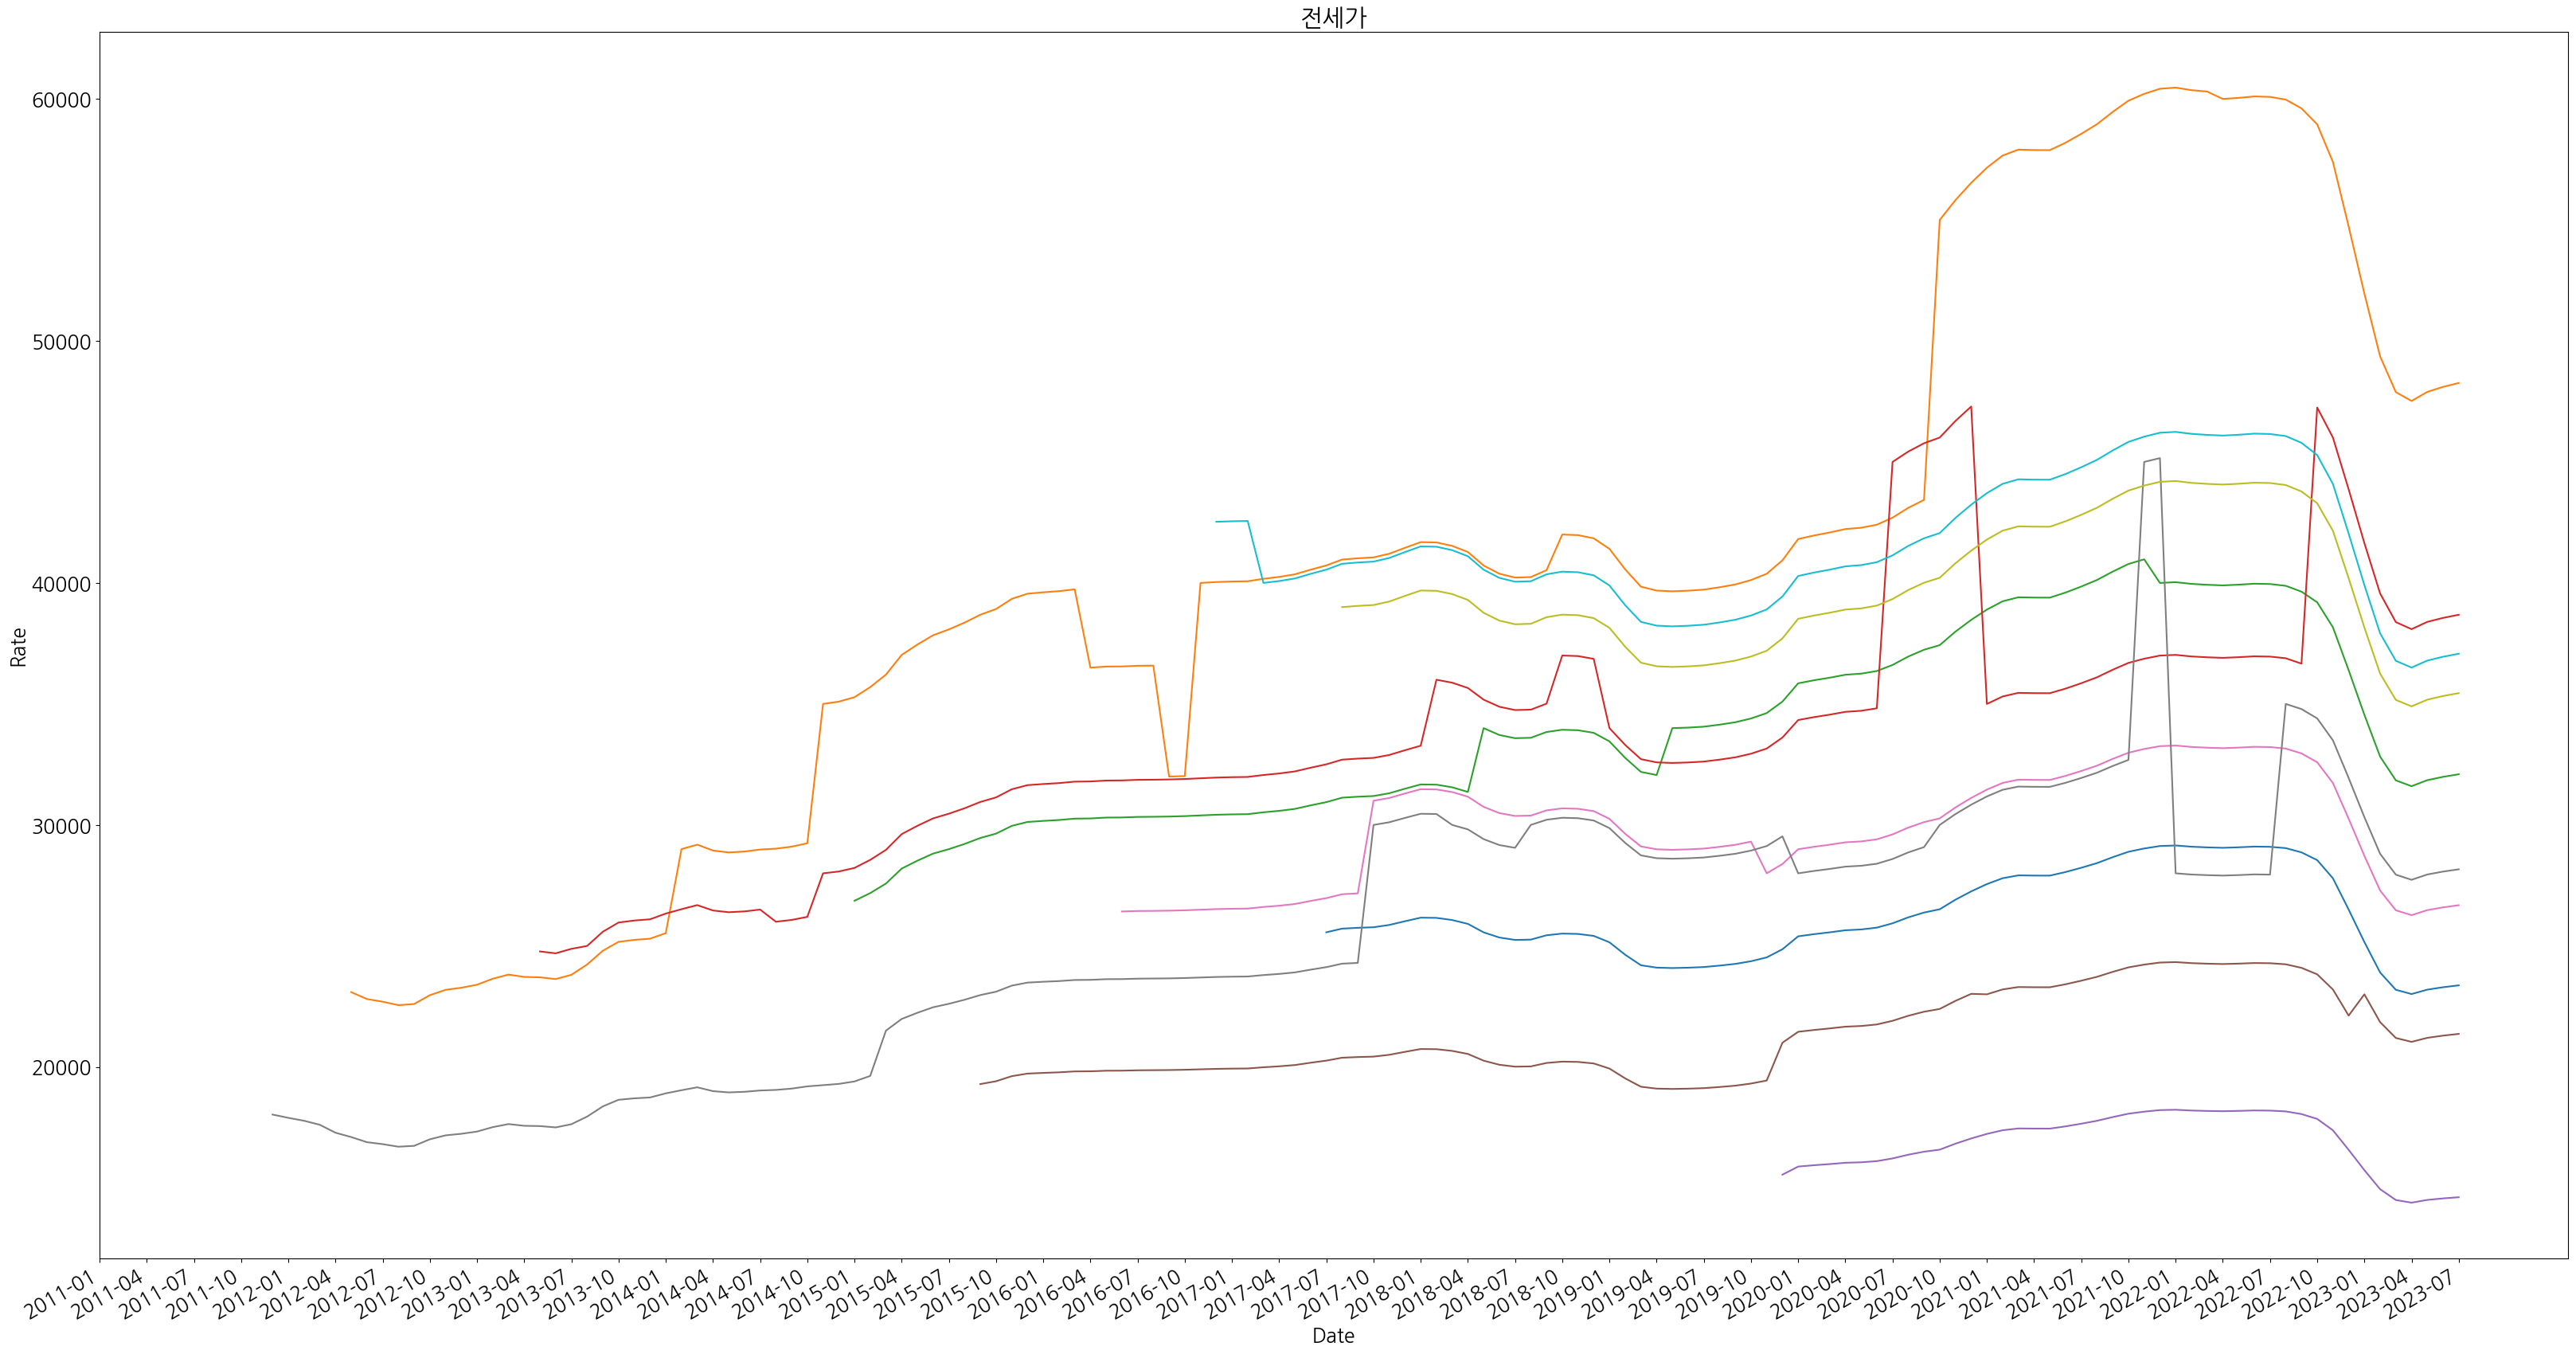

In [37]:
data2_p = data_2[:10]
plt_4 = plt.figure(figsize=(40, 20))
for i in range(10):
    plt.plot(data2_p.iloc[i],)
 
# Giving title to the chart using plt.title
plt.title('전세가')
 
# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(np.arange(0, 151, step=3),rotation=30, ha='right')
 
# Providing x and y label to the chart
plt.xlabel('Date')
plt.ylabel('Rate')

In [7]:
df3 = data_3.iloc[:,24:151]
df3 = df3.fillna(0)

df1_r.shape, df2_r.shape, df3.shape

((39422, 127), (39422, 127), (39422, 127))

In [8]:
39422 * 127

5006594

In [9]:
data_4 = pd.read_csv('매매가평균2.csv')
data_5 = pd.read_csv('전세가평균2.csv')

In [10]:
df4 = data_4.drop(columns=['매매지수'])
df5 = data_5.drop(columns=['전세지수'])

df = pd.merge(df4, df5, how="inner", on=['주소', '건물명', '건축년도', '면적', '층', '계약월', '건물용도'])

df['전세가율'] = df['월별평균 전세가']/df['월별평균 매매가']*100
df['건물'] = df['주소'] + ' ' + df['건물용도']
df['건물'] = df['건물'] + ' ' + df['건물명']
df['건물'] = df['건물'] + '(' + df['건축년도'].astype(str) + ')'
df['건물'] = df['건물'] + ' ' + df['면적'].astype(str) + '㎡'
df['건물'] = df['건물'] + ' ' + df['층']
df = df.drop(columns=['주소', '건물명', '건축년도', '면적', '층', '건물용도'])
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df = df.groupby(['건물', '계약월']).mean().reset_index()
df = df.sort_values(by=['건물', '계약월'], ascending=True).reset_index()
display(df.head())
print(df.shape)

,index,건물,계약월,월별평균 매매가,월별평균 전세가,전세가율
0,0,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-07,55400.000000000,25563.030207819,46.142653805
1,1,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-08,55865.129445923,25714.518156111,46.029640334
2,2,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-09,55768.618436971,25748.462677858,46.170164152
3,3,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-10,55962.980885555,25771.746936577,46.051419222
4,4,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-11,56373.822888943,25866.286637641,45.883506408


(3976345, 6)


In [11]:
dummy_df = pd.DataFrame(columns = ['건물', '계약월','월별평균 매매가', '월별평균 전세가', '전세가율'])

In [12]:
df6 = df.copy()
dummy_df1 = dummy_df.copy()
dummy_df2 = dummy_df.copy()

j1 = 0

for i1, r1 in df1_r.iterrows():
    j1+=1
    dff1 = pd.DataFrame(data = r1).reset_index().reset_index()
    dff1.rename(columns={"level_0": "건물", "index": "계약월", i1: "매매가 변화율"}, inplace = True)
    dff1['건물'] = i1
    dff1 = pd.merge(dff1,df6, how = 'inner')
    dummy_df1 = pd.concat([dummy_df1, dff1], ignore_index=True)
    print(j1)

j2 = 0

for i2, r2 in df2_r.iterrows():
    j2+=1
    dff2 = pd.DataFrame(data = r2).reset_index().reset_index()
    dff2.rename(columns={"level_0": "건물", "index": "계약월", i2: "전세가 변화율"}, inplace = True)
    dff2['건물'] = i2
    dff2 = pd.merge(dff2,df6, how = 'inner')
    dummy_df2 = pd.concat([dummy_df2, dff2], ignore_index=True)
    print(j2)

display(dummy_df1)
display(dummy_df2)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


,건물,계약월,월별평균 매매가,월별평균 전세가,전세가율,매매가 변화율,index
0,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-07,55400.000000000,25563.030207819,46.142653805,0.000000000,0.0
1,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-08,55865.129445923,25714.518156111,46.029640334,0.000000000,1.0
2,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-09,55768.618436971,25748.462677858,46.170164152,0.000000000,2.0
3,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-10,55962.980885555,25771.746936577,46.051419222,0.000000000,3.0
4,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-11,56373.822888943,25866.286637641,45.883506408,0.000000000,4.0
...,...,...,...,...,...,...,...
3735591,중랑구 중화동 454-0 아파트 동양엔파트2차(2013) 96㎡ 2층 초과,2023-03,83658.567397129,45000.000000000,53.790067652,-0.067473874,3976340.0
3735592,중랑구 중화동 454-0 아파트 동양엔파트2차(2013) 96㎡ 2층 초과,2023-04,83239.667063989,44676.854996398,53.672553690,-0.075041309,3976341.0
3735593,중랑구 중화동 454-0 아파트 동양엔파트2차(2013) 96㎡ 2층 초과,2023-05,82999.388734375,44480.292271277,53.591108259,-0.079963817,3976342.0
3735594,중랑구 중화동 454-0 아파트 동양엔파트2차(2013) 96㎡ 2층 초과,2023-06,82954.053200485,44426.263249974,53.555265278,-0.085110000,3976343.0


,건물,계약월,월별평균 매매가,월별평균 전세가,전세가율,전세가 변화율,index
0,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-07,55400.000000000,25563.030207819,46.142653805,0.000000000,0.0
1,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-08,55865.129445923,25714.518156111,46.029640334,0.000000000,1.0
2,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-09,55768.618436971,25748.462677858,46.170164152,0.000000000,2.0
3,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-10,55962.980885555,25771.746936577,46.051419222,0.000000000,3.0
4,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-11,56373.822888943,25866.286637641,45.883506408,0.000000000,4.0
...,...,...,...,...,...,...,...
3735591,중랑구 중화동 454-0 아파트 동양엔파트2차(2013) 96㎡ 2층 초과,2023-03,83658.567397129,45000.000000000,53.790067652,0.071428571,3976340.0
3735592,중랑구 중화동 454-0 아파트 동양엔파트2차(2013) 96㎡ 2층 초과,2023-04,83239.667063989,44676.854996398,53.672553690,0.060430621,3976341.0
3735593,중랑구 중화동 454-0 아파트 동양엔파트2차(2013) 96㎡ 2층 초과,2023-05,82999.388734375,44480.292271277,53.591108259,0.054080395,3976342.0
3735594,중랑구 중화동 454-0 아파트 동양엔파트2차(2013) 96㎡ 2층 초과,2023-06,82954.053200485,44426.263249974,53.555265278,0.049031008,3976343.0


In [15]:
dummy_df11 = dummy_df1.drop(columns=['index'])
dummy_df11 = dummy_df11.groupby(['건물', '계약월']).mean().reset_index()
dummy_df11 = dummy_df11.sort_values(by=['건물', '계약월'], ascending=True)
dummy_df22 = dummy_df2.drop(columns=['index'])
dummy_df22 = dummy_df22.groupby(['건물', '계약월']).mean().reset_index()
dummy_df22 = dummy_df22.sort_values(by=['건물', '계약월'], ascending=True)
display(dummy_df11)
display(dummy_df22)

,건물,계약월,월별평균 매매가,월별평균 전세가,전세가율,매매가 변화율
0,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-07,55400.000000000,25563.030207819,46.142653805,0.000000000
1,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-08,55865.129445923,25714.518156111,46.029640334,0.000000000
2,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-09,55768.618436971,25748.462677858,46.170164152,0.000000000
3,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-10,55962.980885555,25771.746936577,46.051419222,0.000000000
4,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-11,56373.822888943,25866.286637641,45.883506408,0.000000000
...,...,...,...,...,...,...
3735591,중랑구 중화동 454-0 아파트 동양엔파트2차(2013) 96㎡ 2층 초과,2023-03,83658.567397129,45000.000000000,53.790067652,-0.067473874
3735592,중랑구 중화동 454-0 아파트 동양엔파트2차(2013) 96㎡ 2층 초과,2023-04,83239.667063989,44676.854996398,53.672553690,-0.075041309
3735593,중랑구 중화동 454-0 아파트 동양엔파트2차(2013) 96㎡ 2층 초과,2023-05,82999.388734375,44480.292271277,53.591108259,-0.079963817
3735594,중랑구 중화동 454-0 아파트 동양엔파트2차(2013) 96㎡ 2층 초과,2023-06,82954.053200485,44426.263249974,53.555265278,-0.085110000


,건물,계약월,월별평균 매매가,월별평균 전세가,전세가율,전세가 변화율
0,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-07,55400.000000000,25563.030207819,46.142653805,0.000000000
1,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-08,55865.129445923,25714.518156111,46.029640334,0.000000000
2,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-09,55768.618436971,25748.462677858,46.170164152,0.000000000
3,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-10,55962.980885555,25771.746936577,46.051419222,0.000000000
4,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-11,56373.822888943,25866.286637641,45.883506408,0.000000000
...,...,...,...,...,...,...
3735591,중랑구 중화동 454-0 아파트 동양엔파트2차(2013) 96㎡ 2층 초과,2023-03,83658.567397129,45000.000000000,53.790067652,0.071428571
3735592,중랑구 중화동 454-0 아파트 동양엔파트2차(2013) 96㎡ 2층 초과,2023-04,83239.667063989,44676.854996398,53.672553690,0.060430621
3735593,중랑구 중화동 454-0 아파트 동양엔파트2차(2013) 96㎡ 2층 초과,2023-05,82999.388734375,44480.292271277,53.591108259,0.054080395
3735594,중랑구 중화동 454-0 아파트 동양엔파트2차(2013) 96㎡ 2층 초과,2023-06,82954.053200485,44426.263249974,53.555265278,0.049031008


In [16]:
df7 = pd.merge(dummy_df11,dummy_df22)
df7 

,건물,계약월,월별평균 매매가,월별평균 전세가,전세가율,매매가 변화율,전세가 변화율
0,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-07,55400.000000000,25563.030207819,46.142653805,0.000000000,0.000000000
1,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-08,55865.129445923,25714.518156111,46.029640334,0.000000000,0.000000000
2,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-09,55768.618436971,25748.462677858,46.170164152,0.000000000,0.000000000
3,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-10,55962.980885555,25771.746936577,46.051419222,0.000000000,0.000000000
4,강남구 개포동 1164-12 아파트 새롬(1164-12)(2000) 74㎡ 2층 이하,2017-11,56373.822888943,25866.286637641,45.883506408,0.000000000,0.000000000
...,...,...,...,...,...,...,...
3735591,중랑구 중화동 454-0 아파트 동양엔파트2차(2013) 96㎡ 2층 초과,2023-03,83658.567397129,45000.000000000,53.790067652,-0.067473874,0.071428571
3735592,중랑구 중화동 454-0 아파트 동양엔파트2차(2013) 96㎡ 2층 초과,2023-04,83239.667063989,44676.854996398,53.672553690,-0.075041309,0.060430621
3735593,중랑구 중화동 454-0 아파트 동양엔파트2차(2013) 96㎡ 2층 초과,2023-05,82999.388734375,44480.292271277,53.591108259,-0.079963817,0.054080395
3735594,중랑구 중화동 454-0 아파트 동양엔파트2차(2013) 96㎡ 2층 초과,2023-06,82954.053200485,44426.263249974,53.555265278,-0.085110000,0.049031008


In [17]:
df7.to_csv('사용할 데이터.csv')